## Multiple Linear Regression - BostonHousing Dataset

****

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
bos = pd.read_pickle("BostonHousing.pkl")
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
X = bos.drop('PRICE',axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.45948838509182


In [7]:
print('Number of coefficients:',len(lm.coef_))

Number of coefficients: 13


In [8]:
pd.DataFrame([X.columns,lm.coef_],index=['Variables','Coefficients']).T

,Variables,Coefficients
0,CRIM,-0.108011
1,ZN,0.0464205
2,INDUS,0.0205586
3,CHAS,2.68673
4,NOX,-17.7666
5,RM,3.80987
6,AGE,0.000692225
7,DIS,-1.47557
8,RAD,0.306049
9,TAX,-0.0123346


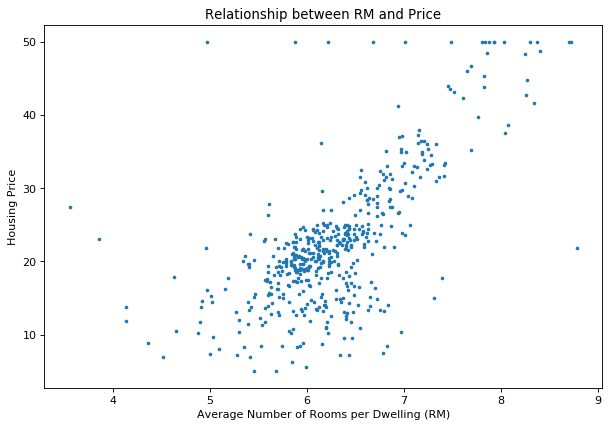

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(bos.RM, bos.PRICE, s=5)
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

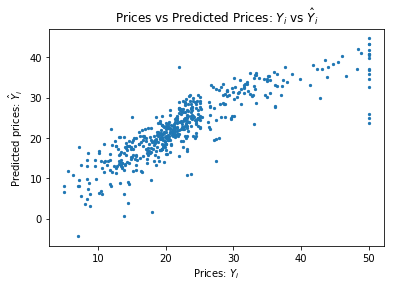

In [10]:
#from matplotlib.pyplot import figure

plt.scatter(bos.PRICE, lm.predict(X),s=5)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [11]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.89483118172921


In [12]:
lm1 = LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376928


### Train-test split. 

In [14]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [15]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split( \
                                   X,bos.PRICE,test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [16]:
lm2 = LinearRegression()
lm2.fit(X_train, Y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

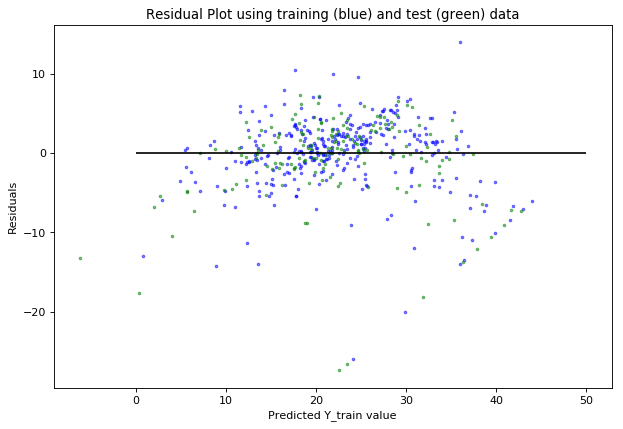

In [17]:
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(lm2.predict(X_train), lm2.predict(X_train) - Y_train, c='b', s=5, alpha=0.5)
plt.scatter(lm2.predict(X_test), lm2.predict(X_test) - Y_test, c='g', s=5, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax=50)
plt.xlabel('Predicted Y_train value')
plt.ylabel('Residuals')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.show()